# CIFAR-10 Dataset für CNN-Autoerkennung

Dieses Notebook lädt den CIFAR-10 Datensatz und bereitet ihn für das Training unseres CNN zur Autoerkennung vor.

## Überblick
- Laden des CIFAR-10 Datensatzes
- Visualisierung von Beispielbildern
- Erstellung binärer Labels (Auto vs. Nicht-Auto)
- Normalisierung der Pixelwerte
- Speichern der vorbereiteten Daten

## Importieren der benötigten Bibliotheken

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import os

2025-03-27 10:41:21.093436: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-27 10:41:21.094139: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 10:41:21.096549: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-27 10:41:21.102456: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743068481.113744 1751562 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743068481.11

## Erstellen des Datenverzeichnisses

Wir erstellen ein Verzeichnis, in dem die vorbereiteten Daten gespeichert werden.

In [2]:
# Erstellen des Datenverzeichnisses
data_dir = '../data'
os.makedirs(data_dir, exist_ok=True)

## Laden des CIFAR-10 Datensatzes

Der CIFAR-10 Datensatz enthält 60.000 Farbbilder in 10 Klassen, mit 6.000 Bildern pro Klasse. Die Bilder haben eine Größe von 32x32 Pixeln. Der Datensatz ist in 50.000 Trainingsbilder und 10.000 Testbilder aufgeteilt.

In [3]:
print("Laden des CIFAR-10 Datensatzes...")
# Laden des CIFAR-10 Datensatzes
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Klassen im CIFAR-10 Datensatz
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Ausgabe der Datensatzgröße
print(f"Trainingsdaten: {x_train.shape[0]} Bilder")
print(f"Testdaten: {x_test.shape[0]} Bilder")
print(f"Bildgröße: {x_train.shape[1]}x{x_train.shape[2]} Pixel mit {x_train.shape[3]} Farbkanälen")

Laden des CIFAR-10 Datensatzes...
Trainingsdaten: 50000 Bilder
Testdaten: 10000 Bilder
Bildgröße: 32x32 Pixel mit 3 Farbkanälen


## Visualisierung von Beispielbildern

Wir zeigen einige Beispielbilder aus dem Datensatz an, um einen Eindruck von den Daten zu bekommen.

Beispielbilder wurden gespeichert.


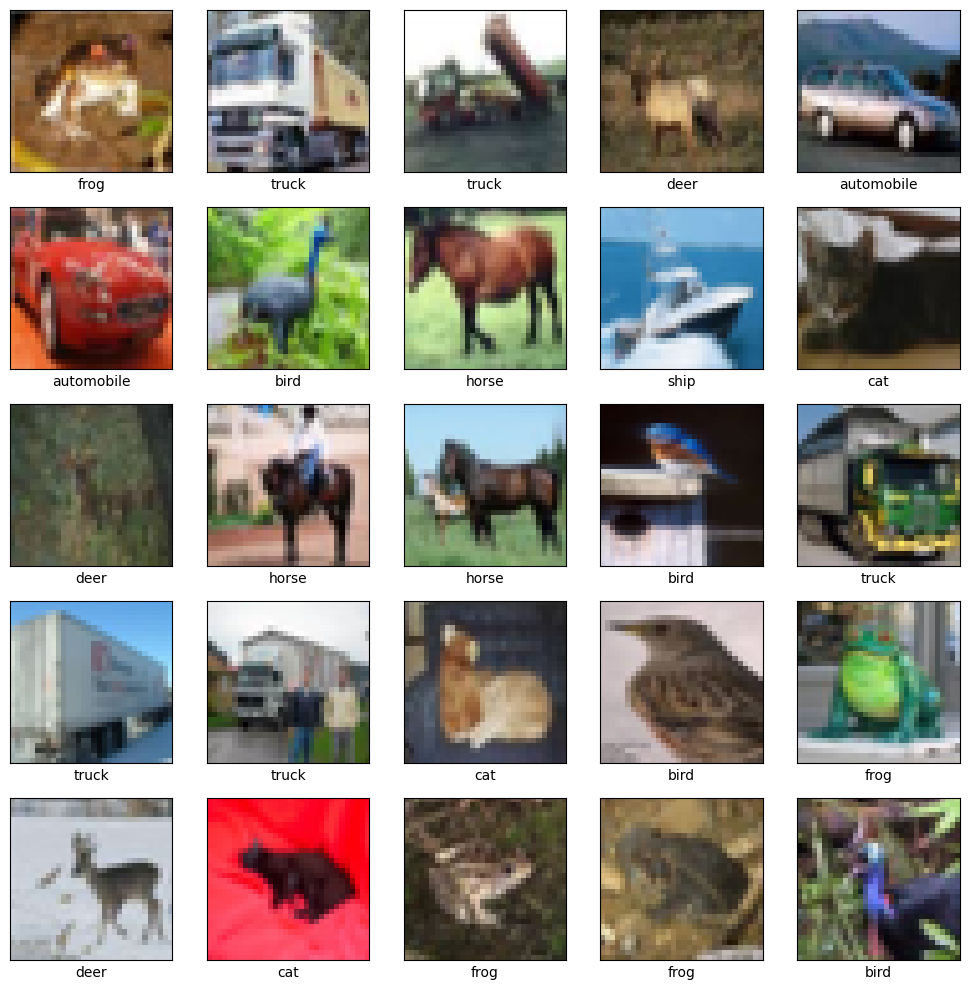

In [4]:
# Anzeigen einiger Beispielbilder
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # Die Labels sind in einem 2D-Array, daher benötigen wir den Index [0]
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'cifar10_examples.png'))
print("Beispielbilder wurden gespeichert.")

## Erstellung binärer Labels (Auto vs. Nicht-Auto)

Da wir nur an der Erkennung von Autos interessiert sind, erstellen wir binäre Labels:
- 1 für Bilder der Klasse 'automobile'
- 0 für alle anderen Klassen

In [5]:
# Index der Auto-Klasse im CIFAR-10 Datensatz
automobile_class_index = class_names.index('automobile')
print(f"Index der Auto-Klasse: {automobile_class_index}")

# Erstellen von binären Labels (Auto = 1, Nicht-Auto = 0)
y_train_binary = (y_train == automobile_class_index).astype(int)
y_test_binary = (y_test == automobile_class_index).astype(int)

# Anzahl der Auto-Bilder im Trainings- und Testdatensatz
train_car_count = np.sum(y_train_binary)
test_car_count = np.sum(y_test_binary)

print(f"Anzahl der Auto-Bilder im Trainingsdatensatz: {train_car_count}")
print(f"Anzahl der Auto-Bilder im Testdatensatz: {test_car_count}")

Index der Auto-Klasse: 1
Anzahl der Auto-Bilder im Trainingsdatensatz: 5000
Anzahl der Auto-Bilder im Testdatensatz: 1000


## Normalisierung der Pixelwerte

Wir normalisieren die Pixelwerte auf den Bereich [0, 1], um das Training des neuronalen Netzes zu verbessern.

In [6]:
# Normalisierung der Pixelwerte auf den Bereich [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Daten wurden normalisiert.")

Daten wurden normalisiert.


## Speichern der vorbereiteten Daten

Wir speichern die vorbereiteten Daten für die spätere Verwendung.

In [7]:
# Speichern der Daten
np.save(os.path.join(data_dir, 'x_train.npy'), x_train)
np.save(os.path.join(data_dir, 'y_train.npy'), y_train)
np.save(os.path.join(data_dir, 'x_test.npy'), x_test)
np.save(os.path.join(data_dir, 'y_test.npy'), y_test)

# Speichern der binären Labels
np.save(os.path.join(data_dir, 'y_train_binary.npy'), y_train_binary)
np.save(os.path.join(data_dir, 'y_test_binary.npy'), y_test_binary)

print("Daten wurden erfolgreich gespeichert.")

Daten wurden erfolgreich gespeichert.


## Visualisierung von Auto-Beispielbildern

Wir zeigen einige Beispielbilder von Autos an, um einen Eindruck von den Daten zu bekommen, mit denen wir arbeiten werden.

Auto-Beispielbilder wurden gespeichert.


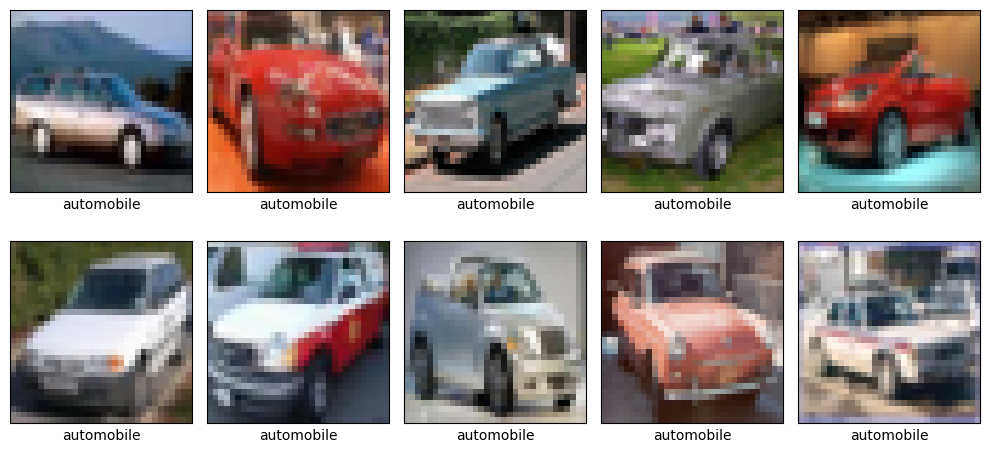

In [8]:
# Indizes der Auto-Bilder im Trainingsdatensatz
car_indices = np.where(y_train == automobile_class_index)[0]

# Anzeigen einiger Auto-Beispiele
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[car_indices[i]])
    plt.xlabel('automobile')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'cifar10_car_examples.png'))
print("Auto-Beispielbilder wurden gespeichert.")

## Zusammenfassung

In diesem Notebook haben wir:
1. Den CIFAR-10 Datensatz geladen
2. Beispielbilder visualisiert
3. Binäre Labels für die Autoerkennung erstellt
4. Die Pixelwerte normalisiert
5. Die vorbereiteten Daten gespeichert

Diese vorbereiteten Daten werden in den nächsten Notebooks für das Training unserer CNN-Modelle zur Autoerkennung verwendet.

In [9]:
print("Datensatzvorbereitung abgeschlossen.")

Datensatzvorbereitung abgeschlossen.
